## Notebook for calculating Mask Consistency Score for GAN-transformed images

In [11]:
from PIL import Image
import cv2
from matplotlib import pyplot as plt
import tensorflow as tf
import glob, os
import numpy as np
import sys
import spacy
import matplotlib.image as mpimg
import pandas as pd
#from keras.preprocessing.image import img_to_array, array_to_img

In [4]:
path_GAN = '/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/SydavisAI/train_all'
path_Masks_1024 = '/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/ImageSize/Blattfeder/SegmentationMasks_1024'
batch_size = 1

## 1. Resize GAN-transformed Dataset to 1024*1024

#### 1.1 Specify Args: Directory, folder name and the new image size

In [10]:
dir = '/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Split_RealSyn_results/1600syn_50re/100/samples_testing/A2B_FID'

#### 1.2 Create new Folder "/A2B_FID_1024" in Directory

In [12]:
folder = dir
image_size = 512
old_folder = (os.path.join(dir, folder))
new_folder = (os.path.join(dir, folder+'_'+str(image_size)))

if not os.path.exists(new_folder):
    try:
        os.mkdir(new_folder)
    except FileExistsError:
        print('Folder already exists')
        pass

In [13]:
print(os.path.join(old_folder))
print(os.path.join(dir, folder+'_'+str(image_size)))

/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Split_RealSyn_results/1600syn_50re/100/samples_testing/A2B_FID
/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Split_RealSyn_results/1600syn_50re/100/samples_testing/A2B_FID_512


#### 1.3 Function for upsampling images of 256-256 or 512-512 to images with size 1024-1024

In [14]:
def resize_upsampling(old_folder, new_folder, size):
    dim = (size, size)
    for image in os.listdir(old_folder):
        img = cv2.imread(os.path.join(old_folder, image))
        # INTER_CUBIC or INTER_LANCZOS4
        img_resized = cv2.resize(img, dim, interpolation = cv2.INTER_LANCZOS4)
        print('Shape: '+str(img.shape)+' is now resized to: '+str(img_resized.shape))
        cv2.imwrite(os.path.join(new_folder , image),img_resized)
        
def resize_downsampling(old_folder, new_folder, size):
    dim = (size, size)
    for image in os.listdir(old_folder):
        #print('Shape: '+str(img.shape)+' is now resized to: '+str(img_resized.shape))
        print(image)
        img = cv2.imread(os.path.join(old_folder, image))
        img_resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
        cv2.imwrite(os.path.join(new_folder , image),img_resized)

#### 1.4 Run the aforementoined function

In [15]:
resize_upsampling(old_folder, new_folder, image_size)

Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now 

Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now 

Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now 

Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now 

Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now 

Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now 

Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)
Shape: (384, 384, 3) is now resized to: (512, 512, 3)


#### Resize the syntetic image masks to 1024-1024

In [176]:
dir2 = '/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/BatchSize/Wandlerhalter'
folder = 'SegmentationMasks'

In [9]:
size = 1024
old_folder = (os.path.join(dir2, folder))
masks_syn_1024 = (os.path.join(dir2, folder+'_'+str(size)))

if os.path.exists(masks_syn_1024):
    try:
        os.mkdir(masks_syn_1024)
    except FileExistsError:
        print('Folder already exists')
resize_downsampling(old_folder, masks_syn_1024, size)

Folder already exists
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1

## 2. Use the annotation Tool Labelme to create polygons for GAN Images in JSON format

We than use the JSON files with polygon data to create semantic segmentation mask - no instance segmentation needed, because we do not need to differenciate between distinct features. We use the bash and python skript in this directory to do the mask translation.

In [42]:
!ls
!pwd

 augmentation.py
 BatchSize_Correlation.xlsx
 BatchSizeResults
 data.py
 datasets
 download_dataset.sh
 FeatureConsistencyScore_3.0.ipynb
 FeatureConsistencyScore_3.1-Copy2.ipynb
 FeatureConsistencyScore_3.1.ipynb
 FeatureConsistencyScore_3.2-Copy2.ipynb
 FeatureConsistencyScore_3.2.ipynb
 FeatureConsistencyScore_3.3.ipynb
 FeatureConsistencyScore_3.3_WCT2.ipynb
 fid.py
 filename.txt
 imlib
 interpolation.py
 json_edit.py
 labelme2coco.py
 labelme2voc.py
 labels.txt
 LICENSE
 mask-score.ipynb
 module.py
'Neural Style Transfer'
 Notebook_Archive
 output
 PearsonCorrelation_normalised.png
 PearsonCorrelation_not_normalised.png
 __pycache__
 pylib
 README.md
 resize_images_pascalvoc
 run_test.sh
 run_training.sh
 sns_jointplot_normalised.png
 sns_jointplot_not_normalised.png
 sns_jointplot_regression_normalised.png
 sns_jointplot_regression_not_normalised.png
 sns_PearsonCorrelation_normalised.png
 sns_PearsonCorrelation_not_normalised.png
 sns_regressionline_normalised.png
 test.py
 tf2g

Insert the folder path as **input_dir** where the GAN transformed images with corresponding JSON label are located.

In [2]:
input_dir = path_GAN
output_dir = input_dir+'_mask'
print(output_dir)

/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/SydavisAI/train_all_mask


In [54]:
!python3 labelme2voc.py $input_dir $output_dir --labels labels.txt

Creating dataset: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/SydavisAI/Wandlerhalter/train_mask
class_names: ('_background_', 'Blattfeder', 'Blattfeder_niO', 'Wandlerhalter', 'Entluefter', 'Getriebeflansch', 'Flansch', 'Flansch_niO', 'Abdeckung', 'Abdeckung_niO', 'Entluefter_Pilz', 'Entluefter_Pilz_niO', 'Verschlussstopfen', 'Verschlussstopfen_niO', '')
Saved class_names: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/SydavisAI/Wandlerhalter/train_mask/class_names.txt
Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/SydavisAI/Wandlerhalter/train/Wandlerhalter_violett_iO_00000079.json
Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/SydavisAI/Wandlerhalter/train/Wandlerhalter_violett_iO_00000083.json
Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/SydavisAI/Wandlerhalter/train/Wandlerhalter_violett_iO_00000099.json
Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_da

Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/SydavisAI/Wandlerhalter/train/Wandlerhalter_violett_iO_00000040.json
Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/SydavisAI/Wandlerhalter/train/Wandlerhalter_violett_iO_00000046.json
Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/SydavisAI/Wandlerhalter/train/Wandlerhalter_violett_iO_00000034.json
Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/SydavisAI/Wandlerhalter/train/Wandlerhalter_violett_iO_00000039.json
Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/SydavisAI/Wandlerhalter/train/Wandlerhalter_violett_iO_00000043.json
Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/SydavisAI/Wandlerhalter/train/Wandlerhalter_violett_iO_00000041.json
Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/SydavisAI/Wandlerhalter/train/Wan

Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/SydavisAI/Wandlerhalter/train/Wandlerhalter_violett_iO_00000010.json
Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/SydavisAI/Wandlerhalter/train/Wandlerhalter_violett_iO_00000012.json
Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/SydavisAI/Wandlerhalter/train/Wandlerhalter_violett_iO_00000007.json
Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/SydavisAI/Wandlerhalter/train/Wandlerhalter_orange_iO_00000077.json
Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/SydavisAI/Wandlerhalter/train/Wandlerhalter_violett_iO_00000020.json
Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/SydavisAI/Wandlerhalter/train/Wandlerhalter_violett_iO_00000016.json
Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/SydavisAI/Wandlerhalter/train/Wand

Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/SydavisAI/Wandlerhalter/train/Wandlerhalter_orange_iO_00000033.json
Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/SydavisAI/Wandlerhalter/train/Wandlerhalter_orange_iO_00000054.json
Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/SydavisAI/Wandlerhalter/train/Wandlerhalter_orange_iO_00000029.json
Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/SydavisAI/Wandlerhalter/train/Wandlerhalter_orange_iO_00000056.json
Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/SydavisAI/Wandlerhalter/train/Wandlerhalter_orange_iO_00000027.json
Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/SydavisAI/Wandlerhalter/train/Wandlerhalter_orange_iO_00000032.json
Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/SydavisAI/Wandlerhalter/train/Wandlerha

In [7]:
input_dir = '/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/SydavisAI/Getriebeflansch_Abdeckung/train'
output_dir = input_dir+'_coco'

In [8]:
!python3 labelme2coco.py $input_dir $output_dir --labels labels.txt

Creating dataset: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/SydavisAI/Getriebeflansch_Abdeckung/train_coco
Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/SydavisAI/Getriebeflansch_Abdeckung/train/Getriebefl_Abed_iO_00000008.json
Traceback (most recent call last):
  File "labelme2coco.py", line 201, in <module>
    main()
  File "labelme2coco.py", line 189, in main
    line_width=2,
  File "/home/molu1019/.virtualenvs/cygan/lib/python3.6/site-packages/imgviz/instances.py", line 65, in instances2rgb
    assert all(label_i >= 0 for label_i in labels)
TypeError: 'int' object is not iterable


In [9]:
masks_gan = output_dir+'/SegmentationObjectPNG'

## 3. GAN Image Data
### 3.1 Prepare Data: Create Folder with binary images

In [149]:
def binarize(im_path, threshold=10, save_digits=10):
    """Read, binarize and save images as png.
    Args:
        path: Path for folder of png images.
    """
    masks_binarized = im_path+'_binarized'
    os.mkdir(masks_binarized)
    
    print(im_path)
    print(masks_binarized)
    
    path = os.path.join(im_path, '*.png')
    files = list(glob.glob(path))
    files.sort(reverse=True)
    
    for file in files:
        size=1024
        img = Image.open(file).convert('L')
        img = np.array(img)
        #print(img[210,:-50])

        # störungen im Bild:
        #16 128 148  35 31 143 153 16 128 153 153 153 153 127  15   0  10 116  35
        thresh = threshold
        Flansch = 89
        Abdeckung = 76
        Mutter =174
        Wandler_stoerung= 153
        Wandler = 157

        im_bool = img > thresh
        #im_bool = np.logical_or(img == Wandler, img ==4)    
        #im_bool = img == Wandler

        maxval = 255
        im_bin = (img > thresh) * maxval

        #save array to images
        im_save_bi = Image.fromarray(np.uint8(im_bin))
        im_save_bool = Image.fromarray((im_bool))
        
        image = im_save_bool
        plt.imshow(image)
        bbox = image.getbbox()
        a = save_digits
        plt.title(f'Bbox: {bbox} Name: {file[-a:]}')
        image.save(os.path.join(masks_binarized,file[-a:]))

    #return im_save_bool

In [150]:
#test GAN Data
masks_gan = path_GAN+'_mask'+'/SegmentationObjectPNG'
masks_gan_binarized = masks_gan+'_binarized'
print(masks_gan)
print(masks_gan_binarized)

/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/ImageSize/Getriebeflansch/Batch1_GF_mask/SegmentationObjectPNG
/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/ImageSize/Getriebeflansch/Batch1_GF_mask/SegmentationObjectPNG_binarized


In [152]:
if not os.path.exists(masks_gan_binarized):
    binarize(masks_gan, 10, 11)
else: 
    print(f'Path: {masks_gan_binarized} binarized syntetic polygon masks already exists')

Path: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/ImageSize/Getriebeflansch/Batch1_GF_mask/SegmentationObjectPNG_binarized binarized syntetic polygon masks already exists


## 4. Syntetic Image Masks
### 4.1 Prepare Data: Create Folder with binary images

#### Operation for reading png segmentation masks from folder path, resize, convert to greyscale and save imagesin new folder

In [153]:
masks_syn = path_Masks_1024
masks_syn_binarized = masks_syn+'_binarized'
print(masks_syn)
print(masks_syn_binarized)

/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/ImageSize/Getriebeflansch/SegmentationMasks_1024
/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/ImageSize/Getriebeflansch/SegmentationMasks_1024_binarized


In [154]:
if not os.path.exists(masks_syn_binarized):
    binarize(masks_syn, 10, 18)
else:
    print(f'Binarized syntetic polygon masks already exists:\n{masks_syn_binarized}')

Binarized syntetic polygon masks already exists:
/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/ImageSize/Getriebeflansch/SegmentationMasks_1024_binarized


Since True is regarded as 1 and False is regarded as 0, when multiplied by 255 which is the Max value of uint8, True becomes 255 (white) and False becomes 0 (black)

In [155]:
def fill_polygon(path):
    masks_binarized = path
    masks_binarized_filled = masks_binarized+'_convex'
    os.mkdir(masks_binarized_filled)
    path_bin = os.path.join(masks_binarized, '*.png')
    files = list(glob.glob(path_bin))
    files.sort(reverse=True)
    
    for file in files:
        image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

        #print(image.shape, image.dtype)
        contour,hierarchy = cv2.findContours(image,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

        for cnt in contour:
            cv2.drawContours(image,[cnt],0,255,-1)

            #image = cv2.bitwise_not(image)
            image.dtype
            plt.imshow(image)
            #bbox = image.getbbox()
            plt.title(f'Bbox: {bbox} Name: {file[-18:]}')
            cv2.imwrite(os.path.join(masks_binarized_filled,file[-18:]),image)

In [156]:
masks_syn_binarized = path_Masks_1024+'_binarized'
masks_syn_binarized_filled = masks_syn_binarized+'_convex'
print(masks_syn_binarized_filled)

/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/ImageSize/Getriebeflansch/SegmentationMasks_1024_binarized_convex


In [157]:
if not os.path.exists(masks_syn_binarized_filled):
    fill_polygon(masks_syn_binarized)
else: 
    print(f'Filled binarized syntetic polygon masks already exists:\n{masks_syn_binarized_filled}')

Filled binarized syntetic polygon masks already exists:
/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/ImageSize/Getriebeflansch/SegmentationMasks_1024_binarized_convex


## 6. Calculate mean IoU
Translate image mask to white RGB(255,255,255), fill convex hull, and compare masks to calculate 'Feature Consistency Score' 

In [158]:
def calculatescore(ground_truth, prediction_gan):
    """
    Compute feature consitency score of two segmentation masks.
    
    IoU(A,B) = |A & B| / (| A U B|)
    Dice(A,B) = 2*|A & B| / (|A| + |B|)

    Args:
        y_true: true masks, one-hot encoded.
        y_pred: predicted masks, either softmax outputs, or one-hot encoded.
        metric_name: metric to be computed, either 'iou' or 'dice'.
        metric_type: one of 'standard' (default), 'soft', 'naive'.
          In the standard version, y_pred is one-hot encoded and the mean
          is taken only over classes that are present (in y_true or y_pred).
          The 'soft' version of the metrics are computed without one-hot
          encoding y_pred.
          
    Returns:
        IoU of ground truth and GAN transformed syntetic Image, as a float.

    Inputs are B*W*H*N tensors, with
        B = batch size,
        W = width,
        H = height,
        N = number of classes
    """
    
    # check image shape to be the same
    assert ground_truth.shape == prediction_gan.shape, 'Input masks should be same shape, instead are {}, {}'.format(ground_truth.shape, prediction_gan.shape)
    #print('Ground truth shape: '+str(ground_truth.shape))
    #print('Predicted GAN image shape: '+str(prediction_gan.shape))
    
    intersection = np.logical_and(ground_truth, prediction_gan)
    union = np.logical_or(ground_truth, prediction_gan)
    mask_sum = np.sum(np.abs(union)) + np.sum(np.abs(intersection))
    iou_score = np.sum(intersection) / np.sum(union)
    dice_score = 2*np.sum(intersection) / np.sum(mask_sum) 
    print('IoU is: '+str(iou_score))
    print('Dice/F1 Score is: '+str(dice_score))
    return iou_score, dice_score

In [159]:
path_syn = masks_syn_binarized_filled
path_gan = masks_gan_binarized
path_syn = os.path.join(path_syn, '*.png')
path_gan = os.path.join(path_gan, '*.png')
files_syn = list(glob.glob(path_syn))
files_gan = list(glob.glob(path_gan))
files_syn.sort(reverse=True)
files_gan.sort(reverse=True)

combined_list = zip(files_syn, files_gan)
z = list(combined_list)

In [160]:
iou_list = []
dice_list = []
for syn, gan in zip(files_syn, files_gan):
    img_syn = np.array(Image.open(syn))
    img_gan = np.array(Image.open(gan))
    print(f'Image name: {syn[-10:]}')
    iou, dice = calculatescore(img_syn, img_gan)
    print('\n')
    iou_list.append(iou)
    dice_list.append(dice)
    
mean_iou = np.mean(iou_list)
mean_dice = np.mean(dice_list)
print(f'Mean IoU is: {mean_iou}')
print(f'{iou_list}\n')
print(f'Mean Dice score is: {mean_dice}')
print(dice_list)

Image name: 153324.png
IoU is: 0.9762856226117901
Dice/F1 Score is: 0.9880005313417856


Image name: 153292.png
IoU is: 0.9666148553955918
Dice/F1 Score is: 0.9830240555171171


Image name: 153226.png
IoU is: 0.959467593381259
Dice/F1 Score is: 0.9793145817998459


Image name: 153161.png
IoU is: 0.9678498780391156
Dice/F1 Score is: 0.9836623096509167


Image name: 153061.png
IoU is: 0.9562704154054008
Dice/F1 Score is: 0.9776464520189878


Image name: 153029.png
IoU is: 0.9745103705552418
Dice/F1 Score is: 0.9870906581070068


Image name: 152930.png
IoU is: 0.9624387623274793
Dice/F1 Score is: 0.9808599185902889


Image name: 152802.png
IoU is: 0.9653539926057465
Dice/F1 Score is: 0.9823716198076264


Image name: 152550.png
IoU is: 0.9742287108268445
Dice/F1 Score is: 0.9869461481175795


Image name: 152355.png
IoU is: 0.9620938896062454
Dice/F1 Score is: 0.9806807866868381


Image name: 152322.png
IoU is: 0.978573216924978
Dice/F1 Score is: 0.9891705887395349


Image name: 152286.png


In [143]:
import sys
base_dir = input_dir
prefix = 'batch'+str(batch_size)
score_name = prefix+'_score.txt'
path = os.path.join(base_dir,score_name)

if not os.path.exists(path):
    try:
        os.mknod(path)
    except FileExistsError:
        print('Folder already exists')
        pass 

original_stdout = sys.stdout             # Save a reference to the original standard output

with open(path, 'w') as f:
    sys.stdout = f                       # Change the standard output to the file we created.
    iou_list = []
    dice_list = []
    print(f'Consistency Metrics for {prefix}:\n')
    for syn, gan in zip(files_syn, files_gan):
        img_syn = np.array(Image.open(syn))
        img_gan = np.array(Image.open(gan))
        print(f'Image name: {syn[-10:]}')
        iou, dice = calculatescore(img_syn, img_gan)
        print('\n')
        iou_list.append(iou)
        dice_list.append(dice)

    mean_iou = np.mean(iou_list)
    mean_dice = np.mean(dice_list)
    print(f'Mean IoU is: {mean_iou}')
    print(f'{iou_list}\n')
    print(f'Mean Dice score is: {mean_dice}')
    print(dice_list)
    sys.stdout = original_stdout         # Reset the standard output to its original value
f.close()

In [144]:
#overlapping of 2 masks
#Image.blend()


In [114]:
cygan = '/home/molu1019/workspace/CycleGAN-Tensorflow-2'
df1 = pd.read_excel(
     os.path.join(cygan, "BatchSize_Correlation.xlsx"),
     engine='openpyxl',
)
df1

,Batch Size,Ansicht,FID,IOU,Training
0,Batch 1,Blattfeder,104.59,0.8519,individual
1,Batch 1,Blattfeder,96.79,0.8717,joint
2,Batch 2,Blattfeder,93.50,0.8987,individual
3,Batch 2,Blattfeder,94.35,0.8845,joint
4,Batch 4,Blattfeder,98.77,0.8871,individual
5,Batch 4,Blattfeder,122.57,0.9627,joint
6,Batch 1,Getriebeflansch,104.75,0.9071,individual
7,Batch 1,Getriebeflansch,72.10,0.8059,joint
8,Batch 2,Getriebeflansch,156.75,0.9082,individual
9,Batch 2,Getriebeflansch,102.81,0.9616,joint


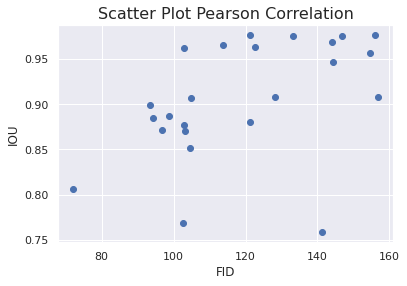

0.468963539070373


In [119]:
s1 = df1['FID']
s2 = df1['IOU']
'''
# Normalising Data between 0 and 1
df1['IOU'] = (df1['IOU'] - np.min(df1['IOU'])) / (np.max(df1['IOU']) - np.min(df1['IOU']))
df1['FID'] = (df1['FID'] - np.min(df1['FID'])) / (np.max(df1['FID']) - np.min(df1['FID']))
s1 = (s1 - np.min(s1)) / (np.max(s1) - np.min(s1))
s2 = (s2 - np.min(s2)) / (np.max(s2) - np.min(s2))
'''
corr = s1.corr(s2, method='pearson')
plt.title('Scatter Plot Pearson Correlation', fontsize=16)
plt.xlabel('FID')
plt.ylabel('IOU')
plt.scatter(s1, s2)
plt.savefig('./PearsonCorrelation_not_normalised.png',format='png')
plt.show()
print(corr)

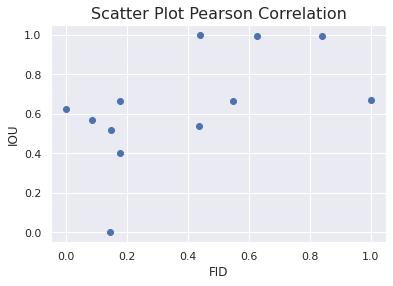

0.5444321041695623


In [120]:
# Slect only Data vor individual training
df2 = df1.loc[df1['Training'] == 'individual']
s1 = df2['FID']
s2 = df2['IOU']

# Normalising Data between 0 and 1
df1['IOU'] = (df1['IOU'] - np.min(df1['IOU'])) / (np.max(df1['IOU']) - np.min(df1['IOU']))
df1['FID'] = (df1['FID'] - np.min(df1['FID'])) / (np.max(df1['FID']) - np.min(df1['FID']))
s1 = (s1 - np.min(s1)) / (np.max(s1) - np.min(s1))
s2 = (s2 - np.min(s2)) / (np.max(s2) - np.min(s2))

corr = s1.corr(s2, method='pearson')
plt.title('Scatter Plot Pearson Correlation', fontsize=16)
plt.xlabel('FID')
plt.ylabel('IOU')
plt.scatter(s1, s2)
plt.savefig('./PearsonCorrelation_normalised.png',format='png')
plt.show()
print(corr)

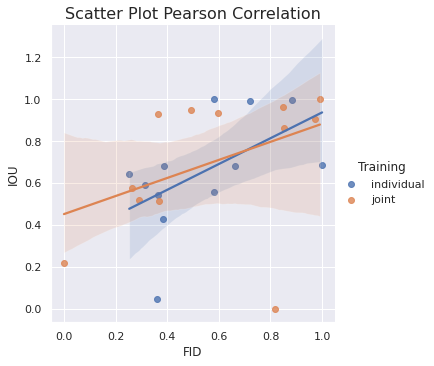

In [121]:
import seaborn as sns
sns.set_theme()
corr_plot = sns.lmplot(x="FID", y="IOU", data=df1, hue='Training')
plt.title('Scatter Plot Pearson Correlation', fontsize=16)
plt.savefig('./sns_PearsonCorrelation_normalised.png',format='png')
plt.show(corr_plot)

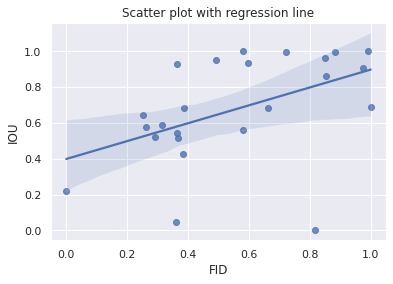

In [96]:
plot1 = sns.regplot(x="FID",
            y="IOU", 
            data=df1)
plt.title('Scatter plot with regression line')
plt.show(plot1)

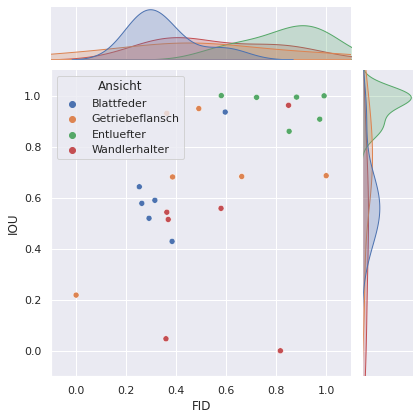

In [92]:
plot2 = sns.jointplot(data=df1, x="FID", y="IOU", xlim=(-0.1, 1.1), ylim=(-0.1, 1.1), hue='Ansicht')
#plt.title('Scatter Plot Pearson Correlation', fontsize=16)
plt.show(plot2)

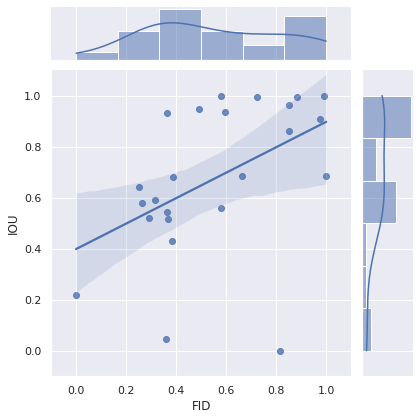

In [87]:
plot3 = sns.jointplot(data=df1, x="FID", y="IOU", xlim=(-0.1, 1.1), ylim=(-0.1, 1.1), kind="reg")
#plt.title('Scatter Plot Pearson Correlation', fontsize=16)
plt.show(plot3)